# 1. Install libraries

In [3]:
pip install praat-parselmouth

     ---------------------------------------- 8.9/8.9 MB 827.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [5]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100 # Show nicely large images in this notebook

In [7]:
snd = parselmouth.Sound(r"C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\CUSTIME videos\MFA\MFA_input\word_h0_05.wav")


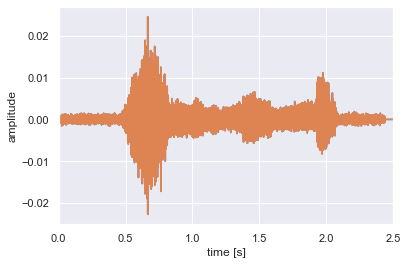

In [8]:
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [9]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

C:\Users\hagar\AppData\Local\Temp\ipykernel_24596\2382691446.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


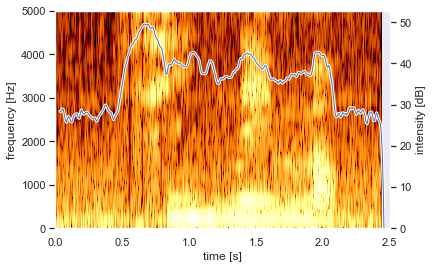

In [10]:
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

In [14]:
! pip install textgrid

In [18]:
import textgrid

tg = textgrid.TextGrid.fromFile(r"C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\CUSTIME videos\MFA\word_h0_01.TextGrid")

# Read a IntervalTier object.


<TextGrid None, 2 Tiers>


In [23]:
# This is the code that you sent me, I had some errors with it so I left it


import os
import textgrid
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import pylab

path2stimuli = r"C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\CUSTIME videos\MFA\MFA_input"

for sentence_num in range(1, 153):
    f_wav = '%i.wav' % sentence_num
    f_lab = '%i.lab' % sentence_num
    f_textgrid = '%i.TextGrid' % sentence_num
    fn_output_fig = '%i.png' % sentence_num

    grid = textgrid.TextGrid(os.path.join(path2stimuli, f_textgrid))
    phones = grid['phones']
    words = grid['words']
    print(phones, words)

    sample_rate, samples = wavfile.read(os.path.join(path2stimuli, f_wav))


    fig, axs = plt.subplots(2, 1, figsize=(20,10))
    times_sec = np.asarray(range(len(samples)))/sample_rate
    axs[0].plot(times_sec, samples/max(abs(samples)))
    pylab.specgram(samples, NFFT=80, Fs=16000, noverlap=40)


    phones_str = []
    phones_times = []
    for phone in phones:
        axs[1].axvline(phone.xmin, ymax=8000, color='k', ls='--')
        # plt.text(phone.xmin, 7500, phone.text, verticalalignment='center')
        phones_str.append(phone.text)
        phones_times.append(phone.xmin)

    for word in words:
        if not word.text in ['sil', 'sp']:
            axs[0].axvline(word.xmin, ymax=8000, color='r', ls='--')
            axs[0].text(word.xmin, 1.1, word.text, verticalalignment='center', fontsize=16)
            axs[1].axvline(word.xmin, ymax=8000, color='r', ls='--')
            axs[1].text(word.xmin, 6500, word.text, verticalalignment='center', fontsize=16)

    plt.setp(axs[0], ylabel='Signal', xlim=[0, max(times_sec)], ylim=[-1, 1])
    axs[0].set_xlabel('Time [sec]', fontsize=14)
    axs[0].set_ylabel('Acoustic Waveform', fontsize=14)
    plt.setp(axs[1], xlim=[0, max(times_sec)], xticks=phones_times, xticklabels=phones_str)
    plt.setp(axs[1].get_xticklabels(), fontsize=14)
    axs[1].set_ylabel('Frequency [Hz]', fontsize=14)

    plt.savefig(os.path.join(path2stimuli, fn_output_fig))
    print('Figure as saved to: %s' % os.path.join(path2stimuli, fn_output_fig))

TypeError: list indices must be integers or slices, not str